In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import Boltzmann
import seaborn as sns
sns.set(style='darkgrid')

In [2]:
#constants
N = 1000
t0 = 0
tf = 15
dt = (tf - t0) / N

#circuit constants
R = 100e3
Cs = [1e-6, 10e-6, 22e-6]
taus = [R*C for C in Cs]
kb = Boltzmann
T = 500
v0 = 20

x = np.zeros(N)
x[0] = v0

In [3]:
#Wiener Process
def dW(dt):
    dW = np.random.normal(0, scale=np.sqrt(dt))
    return dW

#param a RC circuit for an O-U Process
def a(n, x, R, C):
    a = -x / (R * C)
    return a

#param b RC circuit for an O-U Process
def b(kb, T, R, C):
    b = np.sqrt((2 * kb * T) / (R * C**2))
    return b

#numerical solution using Euler-Maruyama method
def euler_maruyama(x, kb, R, C, T, dW):
    for n in range(N-1):
        x[n+1] = x[n] + a(n, x[n], R, C)*dt + b(kb, T, R, C)*dW(dt)
    return x

def v_tau(v0, tau, R, C):
    v_tau = v0*np.exp((-tau)/(R*C))
    return v_tau

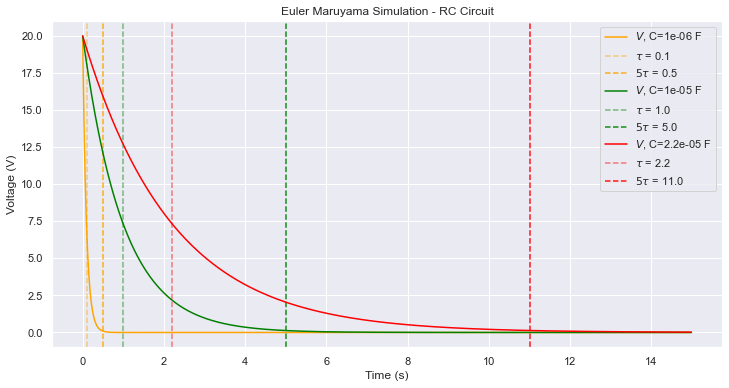

In [4]:
fig, ax = plt.subplots(figsize=(12,6))
colors = ['orange', 'green', 'red']

#plotting simulations
for i in range(len(Cs)):
    C = Cs[i]
    tau = round(taus[i], 2)

    x = euler_maruyama(x, kb, R, C, T, dW)
    t = np.arange(t0, tf, dt)

    ax.set_title('Euler Maruyama Simulation - RC Circuit')
    ax.plot(t, x, color=colors[i],label='$V$, C={} F'.format(C))

    vtau = v_tau(v0, tau, R, C)
    #plt.plot(tau, vtau, 'o', label=r'$V$($\tau={}$)'.format(tau))
    ax.axvline(x=tau, color=colors[i], alpha=0.5, linestyle='--', label=r'$\tau$ = {}'.format(round(tau,2)))
    ax.axvline(x=5*tau, color=colors[i], alpha=0.9, linestyle='--', label=r'$5\tau$ = {}'.format(round(5*tau, 2)))
    plt.plot(tau,)
    plt.ylabel('Voltage (V)')
    plt.xlabel('Time (s)')
    plt.legend()

plt.savefig('figs/euler-maruyama-sim.png', dpi=300)
